In [1]:
import pandas as pd

acs_data = pd.read_csv(r"acs2017_census_tract_data.csv")
acs_data


,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73996,72153750501,Puerto Rico,Yauco Municipio,6011,3035,2976,99.7,0.3,0.0,0.0,...,0.5,0.0,3.6,26.9,1576,59.2,33.8,7.0,0.0,20.8
73997,72153750502,Puerto Rico,Yauco Municipio,2342,959,1383,99.1,0.9,0.0,0.0,...,0.0,0.0,1.3,25.3,666,58.4,35.4,6.2,0.0,26.3
73998,72153750503,Puerto Rico,Yauco Municipio,2218,1001,1217,99.5,0.2,0.0,0.0,...,3.4,0.0,3.4,23.5,560,57.5,34.5,8.0,0.0,23.0
73999,72153750601,Puerto Rico,Yauco Municipio,4380,1964,2416,100.0,0.0,0.0,0.0,...,0.0,0.0,0.0,24.1,1062,67.7,30.4,1.9,0.0,29.5


In [2]:
# Filter and select the required columns from the ACS data
required_columns = ['County', 'State', 'TotalPop', 'IncomePerCap', 'Poverty']
acs_data_filtered = acs_data[required_columns].copy()

# Create a new column 'ID' as a unique identifier for the county
acs_data_filtered['ID'] = range(len(acs_data_filtered))

# Group the data by 'County' and 'State' and aggregate the values using appropriate aggregation functions
aggregated_data = acs_data_filtered.groupby(['County', 'State']).agg({'TotalPop': 'sum', 'IncomePerCap': 'mean', 'Poverty': 'mean'})

# Reset the index of the aggregated DataFrame
County_Info = aggregated_data.reset_index()

# Rename the columns to match the desired column names
County_Info.rename(columns={'County': 'county','TotalPop': 'Population', 'IncomePerCap': 'PerCapitaIncome'}, inplace=True)

# Reset the 'ID' column to start from 1
County_Info['ID'] = County_Info.index + 1
# column_order = ['ID', 'Name', 'State', 'Population', 'Poverty', 'PerCapitaIncome']
# County_Info = County_Info[column_order]
County_Info

,county,State,Population,PerCapitaIncome,Poverty,ID
0,Abbeville County,South Carolina,24788,19402.833333,22.183333,1
1,Acadia Parish,Louisiana,62607,21454.250000,21.933333,2
2,Accomack County,Virginia,32840,24769.750000,20.112500,3
3,Ada County,Idaho,435117,32672.661017,12.608475,4
4,Adair County,Iowa,7192,28840.666667,9.566667,5
...,...,...,...,...,...,...
3215,Yuma County,Arizona,204281,21479.641509,19.357692,3216
3216,Yuma County,Colorado,10109,24841.000000,14.350000,3217
3217,Zapata County,Texas,14415,17884.333333,32.566667,3218
3218,Zavala County,Texas,12152,12660.250000,41.375000,3219


In [5]:
county_inputs = ["Loudoun County, Virginia", "Washington County, Oregon", "Harlan County, Kentucky", "Malheur County, Oregon"]

county_details = pd.DataFrame(columns=County_Info.columns)  

for input_county in county_inputs:
    county_name, state_name = input_county.split(", ")
    details = County_Info[(County_Info['county'] == county_name) & (County_Info['State'] == state_name)]
#     county_details = county_details.append(details)
    county_details = pd.concat([county_details, details], ignore_index=True)

print(county_details)


              county     State Population  PerCapitaIncome    Poverty    ID
0     Loudoun County  Virginia     374558     50391.015625   3.884375  1760
1  Washington County    Oregon     572071     34970.817308  10.446154  3047
2      Harlan County  Kentucky      27548     16010.363636  33.318182  1235
3     Malheur County    Oregon      30421     17966.428571  24.414286  1823


In [6]:
covid_data = pd.read_csv(r"COVID_county_data.csv")
covid_data

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
1050253,2021-02-20,Sweetwater,Wyoming,56037.0,3645,34.0
1050254,2021-02-20,Teton,Wyoming,56039.0,3318,9.0
1050255,2021-02-20,Uinta,Wyoming,56041.0,2024,12.0
1050256,2021-02-20,Washakie,Wyoming,56043.0,876,26.0


In [7]:
# Assuming the dataset is stored in a DataFrame called 'covid_data'
covid_data['ID'] = covid_data['county'] + '_' + covid_data['state']
covid_data['ID'] = pd.factorize(covid_data['ID'])[0] + 1

covid_data


,date,county,state,fips,cases,deaths,ID
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0,1
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0,1
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0,1
3,2020-01-24,Cook,Illinois,17031.0,1,0.0,2
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0,1
...,...,...,...,...,...,...,...
1050253,2021-02-20,Sweetwater,Wyoming,56037.0,3645,34.0,1357
1050254,2021-02-20,Teton,Wyoming,56039.0,3318,9.0,640
1050255,2021-02-20,Uinta,Wyoming,56041.0,2024,12.0,2305
1050256,2021-02-20,Washakie,Wyoming,56043.0,876,26.0,1784


In [8]:
covid_data['date'] = pd.to_datetime(covid_data['date'], format='%Y-%m-%d')
# print(covid_data['date'].dtype)
covid_data['month'] = covid_data['date'].dt.to_period('M')
covid_data

,date,county,state,fips,cases,deaths,ID,month
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0,1,2020-01
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0,1,2020-01
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0,1,2020-01
3,2020-01-24,Cook,Illinois,17031.0,1,0.0,2,2020-01
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0,1,2020-01
...,...,...,...,...,...,...,...,...
1050253,2021-02-20,Sweetwater,Wyoming,56037.0,3645,34.0,1357,2021-02
1050254,2021-02-20,Teton,Wyoming,56039.0,3318,9.0,640,2021-02
1050255,2021-02-20,Uinta,Wyoming,56041.0,2024,12.0,2305,2021-02
1050256,2021-02-20,Washakie,Wyoming,56043.0,876,26.0,1784,2021-02


In [9]:
covid_data_monthly = covid_data.groupby(['ID', 'month']).agg({
    'cases': 'sum',
    'deaths': 'sum',
    'county': 'first'
}).reset_index()

covid_data_monthly['ID'] = range(1, len(covid_data_monthly) + 1)
covid_data_monthly = covid_data_monthly[['ID', 'month', 'cases', 'deaths', 'county']].copy()

covid_data_monthly.columns = ['ID', 'Month', 'cases', 'deaths', 'county']

covid_data_monthly


,ID,Month,cases,deaths,county
0,1,2020-01,11,0.0,Snohomish
1,2,2020-02,31,0.0,Snohomish
2,3,2020-03,11076,246.0,Snohomish
3,4,2020-04,58740,2366.0,Snohomish
4,5,2020-05,94534,3898.0,Snohomish
...,...,...,...,...,...
37252,37253,2020-11,1,0.0,Unknown
37253,37254,2020-12,22,0.0,Kalawao
37254,37255,2021-01,31,0.0,Kalawao
37255,37256,2021-02,20,0.0,Kalawao


In [10]:
selected_months = ['2020-08', '2021-01', '2021-02']
selected_county = 'Malheur'
covid_report = covid_data_monthly[(covid_data_monthly['county'] == selected_county) & 
                              (covid_data_monthly['Month'].astype(str).isin(selected_months))]

print(covid_report)

          ID    Month  cases  deaths   county
25593  25594  2020-08  28163   459.0  Malheur
25598  25599  2021-01  96297  1627.0  Malheur
25599  25600  2021-02  65951  1137.0  Malheur


In [12]:
covid_summary = (covid_data_monthly.groupby("ID").agg({"cases": "sum", "deaths": "sum"}).reset_index())
covid_summary.rename(columns={"cases": "TotalCases", "deaths": "TotalDeaths"}, inplace=True)
covid_summary = pd.merge(covid_summary, County_Info, how="left", on="ID")
covid_summary["TotalCasesPer100K"] = round((covid_summary["TotalCases"]) / (covid_summary["Population"] / 100000), 2)
covid_summary["TotalDeathsPer100K"] = round((covid_summary["TotalDeaths"]) / (covid_summary["Population"] / 100000), 2)
display(covid_summary)

,ID,TotalCases,TotalDeaths,county,State,Population,PerCapitaIncome,Poverty,TotalCasesPer100K,TotalDeathsPer100K
0,1,11,0.0,Abbeville County,South Carolina,24788.0,19402.833333,22.183333,44.38,0.00
1,2,31,0.0,Acadia Parish,Louisiana,62607.0,21454.250000,21.933333,49.52,0.00
2,3,11076,246.0,Accomack County,Virginia,32840.0,24769.750000,20.112500,33727.16,749.09
3,4,58740,2366.0,Ada County,Idaho,435117.0,32672.661017,12.608475,13499.82,543.76
4,5,94534,3898.0,Adair County,Iowa,7192.0,28840.666667,9.566667,1314432.70,54199.11
...,...,...,...,...,...,...,...,...,...,...
37252,37253,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37253,37254,22,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37254,37255,31,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37255,37256,20,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
counties = [('Washington County', 'Oregon'), ('Malheur County', 'Oregon'), ('Loudoun County', 'Virginia'), ('Harlan County', 'Kentucky')]

# Filter the DataFrame based on the specified counties
filtered_df = covid_summary[
    (covid_summary['county'].isin([county[0] for county in counties])) &
    (covid_summary['State'].isin([county[1] for county in counties]))
]

# Extract the 'Poverty%' and 'TotalCasesPer100K' values for the specified counties
poverty_percentage = filtered_df[['county', 'State', 'Poverty']]
total_cases_per_100k = filtered_df[['county', 'State', 'TotalCasesPer100K']]

# Print the results
print("Poverty Percentage:")
print(poverty_percentage)
print("\nTotal Cases per 100K:")
print(total_cases_per_100k)

Poverty Percentage:
                 county     State    Poverty
1234      Harlan County  Kentucky  33.318182
1759     Loudoun County  Virginia   3.884375
1822     Malheur County    Oregon  24.414286
3035  Washington County  Kentucky  16.900000
3046  Washington County    Oregon  10.446154
3053  Washington County  Virginia  14.715385

Total Cases per 100K:
                 county     State  TotalCasesPer100K
1234      Harlan County  Kentucky         1671979.82
1759     Loudoun County  Virginia            3086.84
1822     Malheur County    Oregon          542792.81
3035  Washington County  Kentucky          178864.91
3046  Washington County    Oregon           61741.46
3053  Washington County  Virginia              55.09


In [14]:
oregon_county = covid_summary[covid_summary['State'] == 'Oregon']
print(oregon_county)

        ID  TotalCases  TotalDeaths             county   State  Population  \
126    127      176630       7094.0       Baker County  Oregon     15980.0   
197    198      269042       2377.0      Benton County  Oregon     88249.0   
533    534       64549       2655.0   Clackamas County  Oregon    399962.0   
558    559      165400       8893.0     Clatsop County  Oregon     38021.0   
631    632        9177        720.0    Columbia County  Oregon     50207.0   
656    657       25645        265.0        Coos County  Oregon     62921.0   
697    698     1099390      19381.0       Crook County  Oregon     21717.0   
718    719      294898       2637.0       Curry County  Oregon     22377.0   
796    797         455         21.0   Deschutes County  Oregon    175321.0   
839    840      513374       8400.0     Douglas County  Oregon    107576.0   
1068  1069     1247029      27789.0     Gilliam County  Oregon      1910.0   
1115  1116       11712         93.0       Grant County  Oregon  

In [15]:
#COVID total cases vs. % population in poverty

analysis_1a = oregon_county['TotalCases'].corr(oregon_county['Poverty'])
print(analysis_1a)

0.05448687198634776


In [17]:
#COVID total deaths vs. % population in poverty

analysis_1b = oregon_county['TotalDeaths'].corr(oregon_county['Poverty'])
print(analysis_1b)

-0.003927649458842


In [18]:
#COVID total cases vs. Per Capita Income level

analysis_1c = oregon_county['TotalCases'].corr(oregon_county['PerCapitaIncome'])
print(analysis_1c)

-0.2557187510018219


In [19]:
#COVID total deaths vs. Per Capita Income level

analysis_1d = oregon_county['TotalDeaths'].corr(oregon_county['PerCapitaIncome'])
print(analysis_1d)

-0.2878717772723963


In [20]:
#COVID total cases vs. % population in poverty

r2 = covid_summary['TotalCases'].corr(covid_summary['Poverty'])
print(r2)

0.02172395775348985


In [21]:
#COVID total deaths vs. % population in poverty

r2 = covid_summary['TotalDeaths'].corr(covid_summary['Poverty'])
print(r2)

0.00988447825942164


In [22]:
#COVID total cases vs. Per Capita Income level

r2 = covid_summary['TotalCases'].corr(covid_summary['PerCapitaIncome'])
print(r2)

-0.02544712849260709


In [37]:
#COVID total deaths vs. Per Capita Income level

r2 = covid_summary['TotalDeaths'].corr(covid_summary['PerCapitaIncome'])
print(r2)

-0.012554716257096216


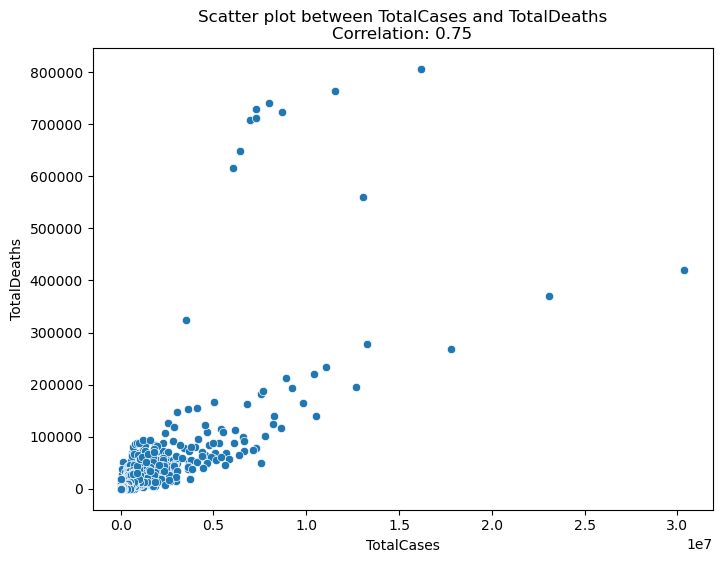

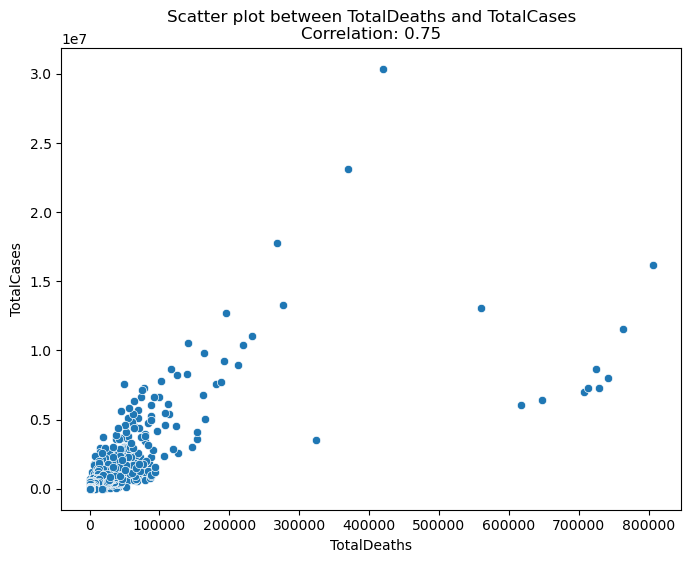

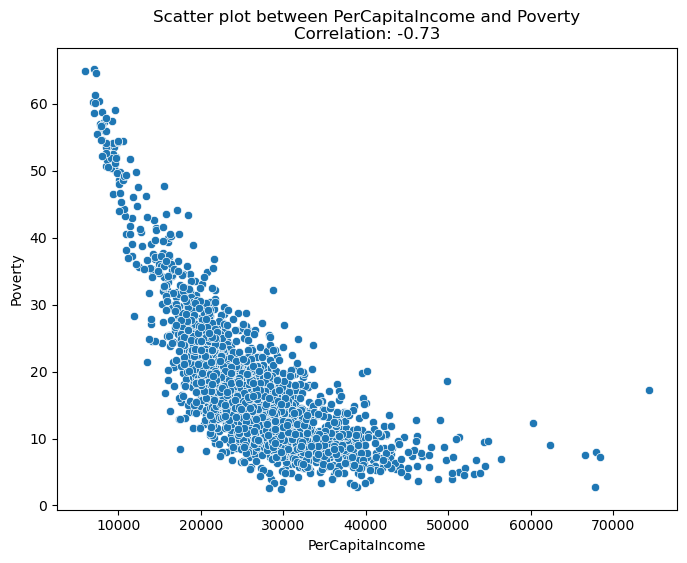

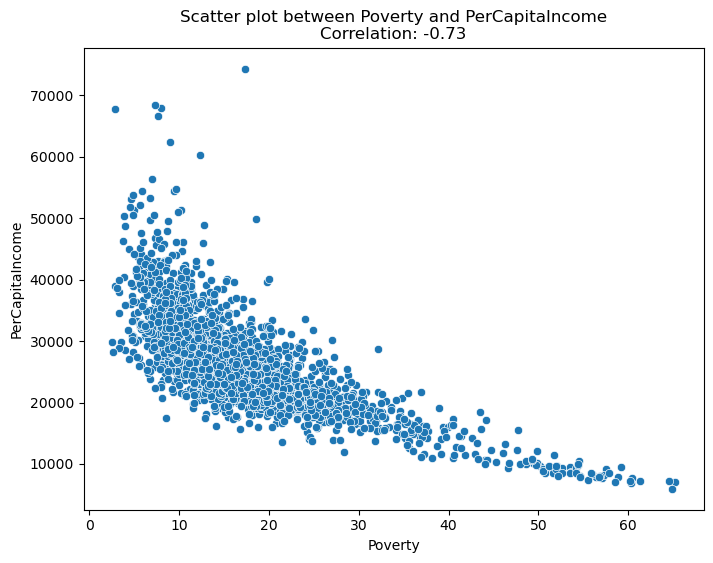

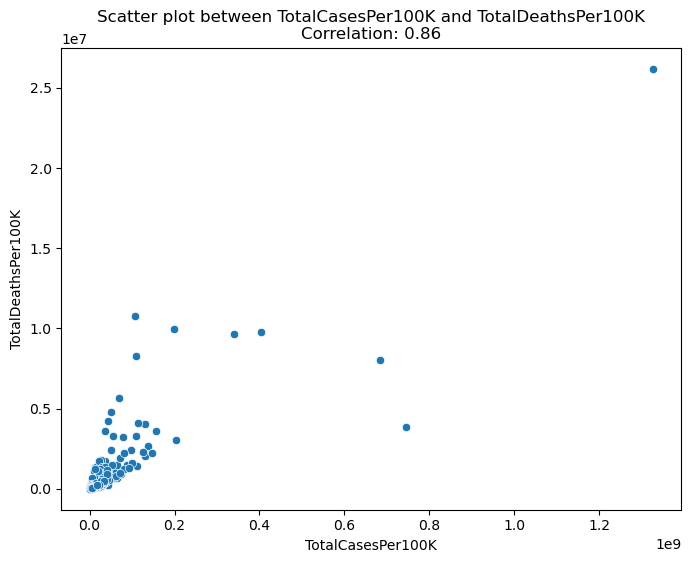

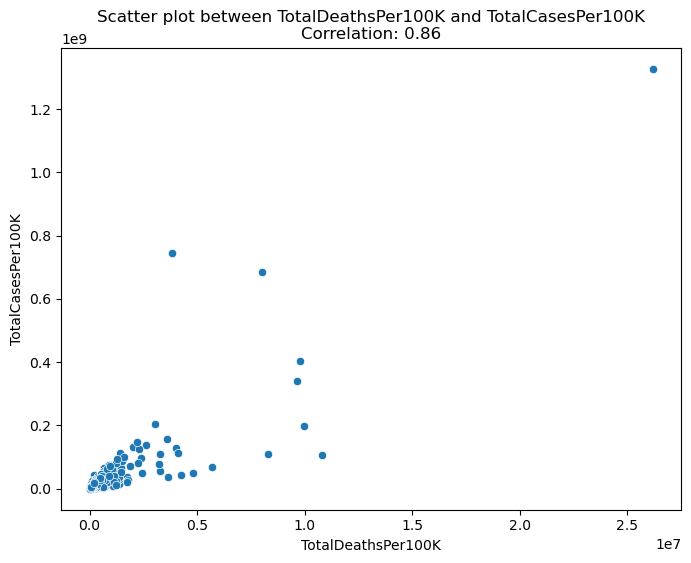

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation matrix
numeric_df = covid_summary.select_dtypes(include=[float, int])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Filter correlations greater than 0.5 or less than -0.5
strong_correlations = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)]

# Remove self-correlations
strong_correlations = strong_correlations[strong_correlations != 1.0]

# Flatten the matrix and drop NaN values
strong_correlations = strong_correlations.stack().reset_index()
strong_correlations.columns = ['Variable1', 'Variable2', 'Correlation']
strong_correlations = strong_correlations.dropna()

# Plot scatter plots for strong correlations
for index, row in strong_correlations.iterrows():
    var1 = row['Variable1']
    var2 = row['Variable2']
    correlation = row['Correlation']
    
    if abs(correlation) > 0.5:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=covid_summary, x=var1, y=var2)
        plt.title(f'Scatter plot between {var1} and {var2}\nCorrelation: {correlation:.2f}')
        plt.xlabel(var1)
        plt.ylabel(var2)
        plt.show()